In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
target_name = 'bottom10pct_wealth_share'

df = pd.read_csv(f'output/feature_importance/shap_values_{target_name}.csv')

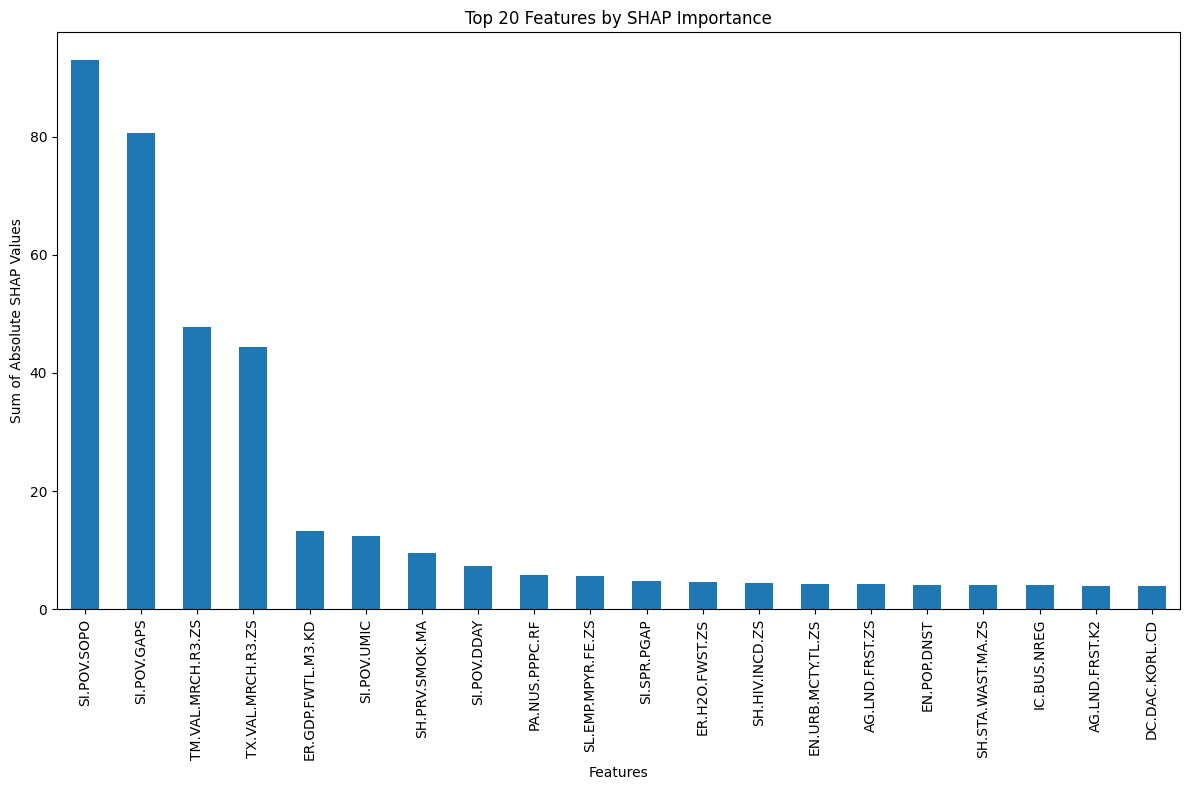

Top 20 most important features:
SI.POV.SOPO: 93.0582
SI.POV.GAPS: 80.6105
TM.VAL.MRCH.R3.ZS: 47.7774
TX.VAL.MRCH.R3.ZS: 44.3542
ER.GDP.FWTL.M3.KD: 13.2365
SI.POV.UMIC: 12.3094
SH.PRV.SMOK.MA: 9.5275
SI.POV.DDAY: 7.3558
PA.NUS.PPPC.RF: 5.8052
SL.EMP.MPYR.FE.ZS: 5.6641
SI.SPR.PGAP: 4.7409
ER.H2O.FWST.ZS: 4.5793
SH.HIV.INCD.ZS: 4.5024
EN.URB.MCTY.TL.ZS: 4.3081
AG.LND.FRST.ZS: 4.2819
EN.POP.DNST: 4.1140
SH.STA.WAST.MA.ZS: 4.0416
IC.BUS.NREG: 4.0331
AG.LND.FRST.K2: 3.8636
DC.DAC.KORL.CD: 3.8288


In [28]:
# Calculate absolute SHAP values
abs_shap = df.abs()

# Sum absolute SHAP values for each feature
feature_importance = abs_shap.sum().sort_values(ascending=False)

# Get top 20 most important features
top_features = feature_importance.head(20)

# Create a bar plot of the top 20 features
plt.figure(figsize=(12, 8))
top_features.plot(kind='bar')
plt.title('Top 20 Features by SHAP Importance')
plt.xlabel('Features')
plt.ylabel('Sum of Absolute SHAP Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the top 20 features
print("Top 20 most important features:")
for feature, importance in top_features.items():
    print(f"{feature}: {importance:.4f}")

In [29]:
top_features_df = pd.DataFrame(top_features).reset_index()
top_features_df.columns = ['Feature', 'Importance']
indicator_lookup = pd.read_csv('reference/indicator_lookup.csv')
top_features_df = top_features_df.merge(indicator_lookup, left_on='Feature', right_on='Indicator Code', how='left')
top_features_df = top_features_df[['Feature', 'Indicator Name', 'Importance']]
top_features_df.to_csv(f'output/feature_importance/SHAP_top_features_{target_name}.csv', index=False)
top_features_df

,Feature,Indicator Name,Importance
0,SI.POV.SOPO,Poverty headcount ratio at societal poverty li...,93.058193
1,SI.POV.GAPS,Poverty gap at $2.15 a day (2017 PPP) (%),80.610535
2,TM.VAL.MRCH.R3.ZS,Merchandise imports from low- and middle-incom...,47.777424
3,TX.VAL.MRCH.R3.ZS,Merchandise exports to low- and middle-income ...,44.354246
4,ER.GDP.FWTL.M3.KD,"Water productivity, total (constant 2015 US$ G...",13.236450
5,SI.POV.UMIC,Poverty headcount ratio at $6.85 a day (2017 P...,12.309367
6,SH.PRV.SMOK.MA,"Prevalence of current tobacco use, males (% of...",9.527539
7,SI.POV.DDAY,Poverty headcount ratio at $2.15 a day (2017 P...,7.355817
8,PA.NUS.PPPC.RF,Price level ratio of PPP conversion factor (GD...,5.805151
9,SL.EMP.MPYR.FE.ZS,"Employers, female (% of female employment) (mo...",5.664101
